In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans



In [31]:

image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

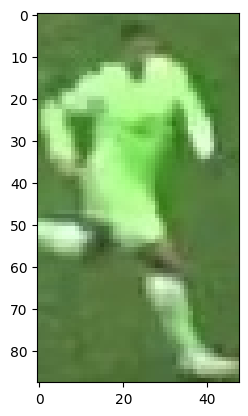

In [26]:
plt.imshow(image)

 Basicly because I want to detect which players are from which teams, I just want the colour of the shirt hes wearing so ill cut the image in half

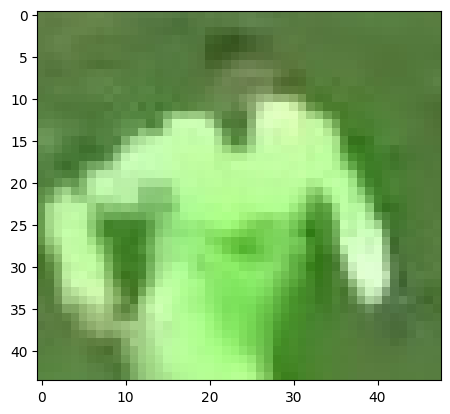

In [32]:
top_half_image=  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

 Now I will separe the image in 2 collours

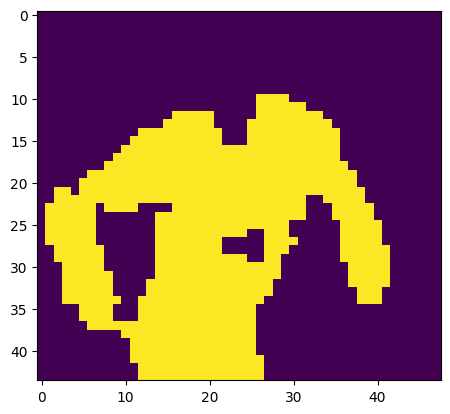

In [35]:
image_2d = top_half_image.reshape((-1, 3))
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)         # the algorithm selects the 2 most dominant colours in the image

labels = kmeans.labels_                                              #  then it assigns each pixel in the image to one of the 2 colours

clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])  # reshape the image to its original shape

plt.imshow(clustered_image)


In [36]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [37]:
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [38]:
kmeans.cluster_centers_[player_cluster]

array([171.22060766, 235.5984148 , 142.54689564])